# Fase1:Tech Challenge - Medical Insurance EDA and Regression

## Problem Statement
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

## Dataset Research
 O dataset medical_insurance.csv foi composto dos dados fornecidos pelo problema e pesquisas realizadas ao site Kaggle: 
 
 [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) 
 
 [Kaggle - Medical Insurance Cost Prediction](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction).
 
O cabeçalho do dataset foi adodato a ligua ingleza para facilitar a padronização e manipulação dos dados.
O Dataset contém 7 colunas , sendo elas:
- age: idade
- sex: sexo
- bmi: índice de massa corporal
- children: número de filhos/dependentes
- smoker: fumante
- region: região
- charges: encargos

### Importação das bibliotecas e dos dados

In [107]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [108]:
# Carregamento dos dados
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300


### Conhecendo os dados
#### Análise Exploratória dos Dados


In [109]:
# Verificando o tamanho do dataset
df.shape

(4113, 7)

In [110]:
# Verificando os tipos de dados
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [111]:
# Verificando valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [112]:
# Verificando valores duplicados
df.duplicated().sum()

2773

In [113]:
# Verificando a descrição dos dados 
df.describe()

,age,bmi,children,charges
count,4113.000000,4113.000000,4113.000000,4113.000000
mean,39.145393,30.685731,1.099441,13273.902783
std,14.067748,6.117991,1.211401,12137.945368
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


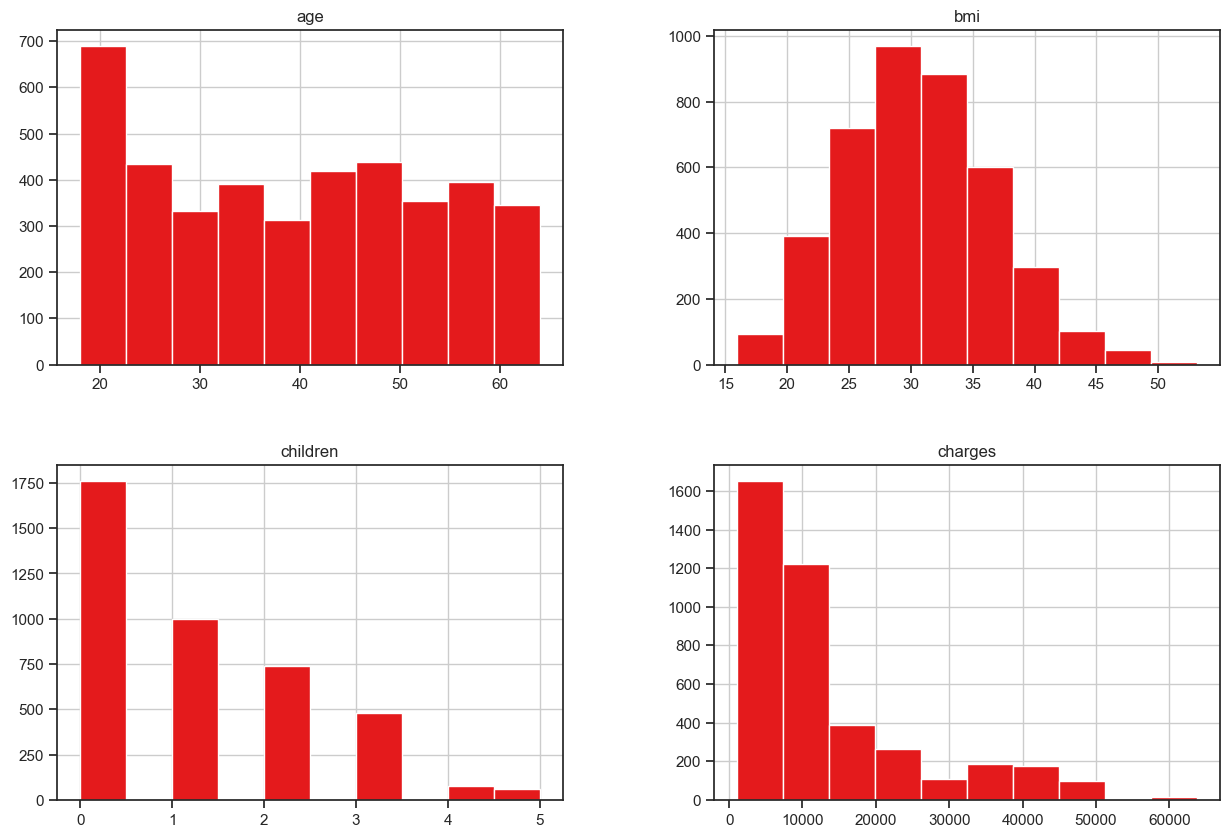

In [114]:
# Verificando a distribuição das variáveis
df.hist(figsize=(15,10))
plt.show()


In [115]:
# Verificando a correlação das variáveis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 1000x600 with 0 Axes>

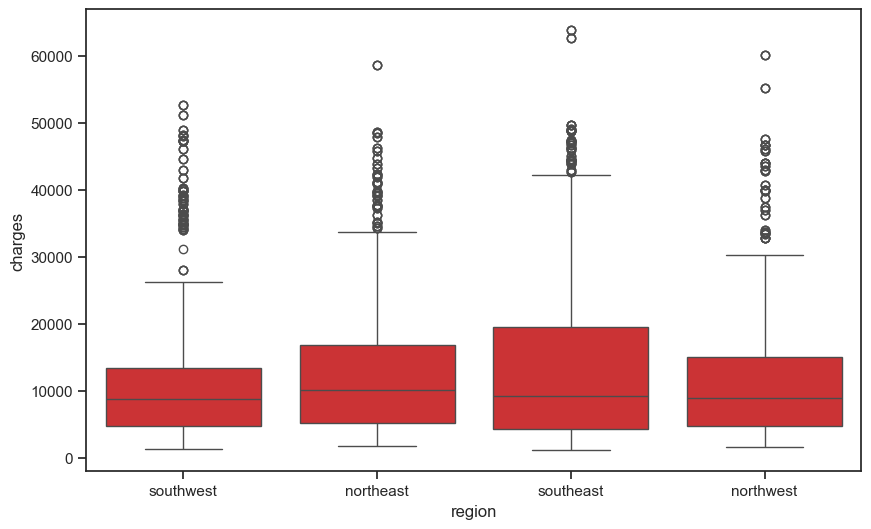

In [116]:
# Verificando a distribuição dos encargos por região
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df)
plt.show()

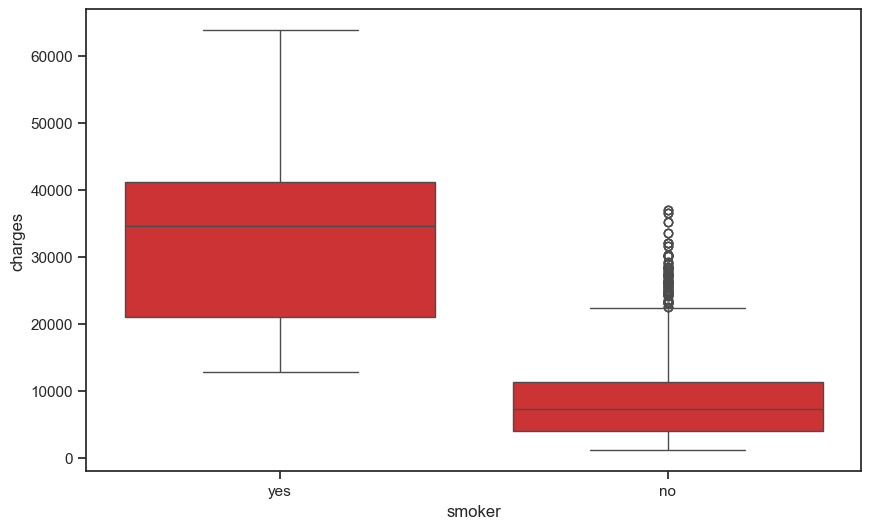

In [117]:
# Verificando a distribuição dos encargos por fumantes
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


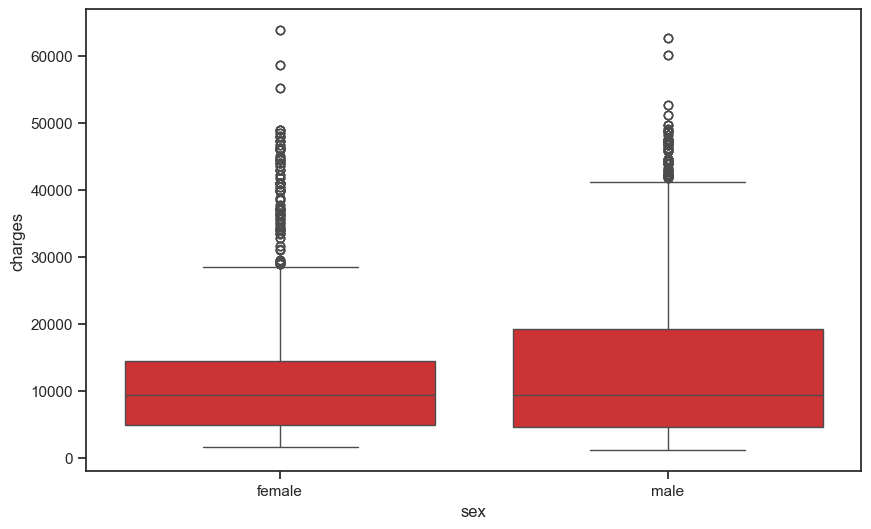

In [118]:
# Verificando a distribuição dos encargos por sexo
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='charges', data=df)
plt.show()

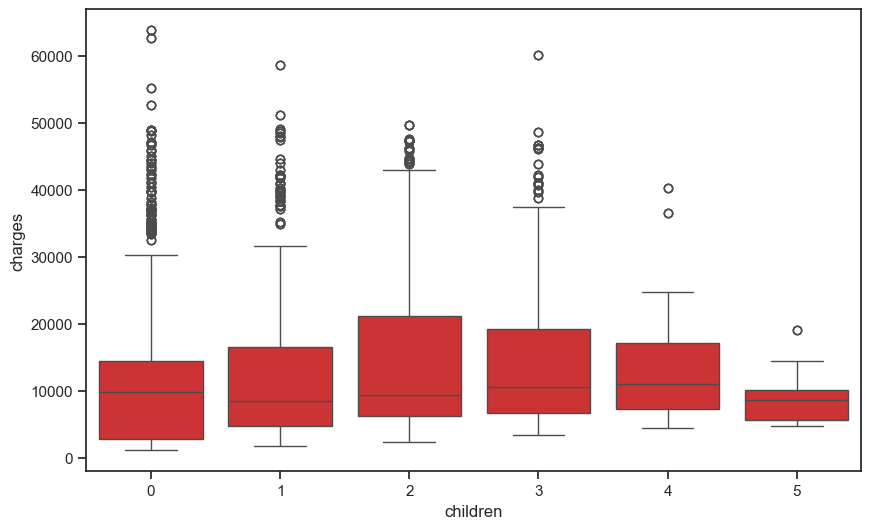

In [119]:
# Verificando a distribuição dos encargos por número de filhos
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.show()

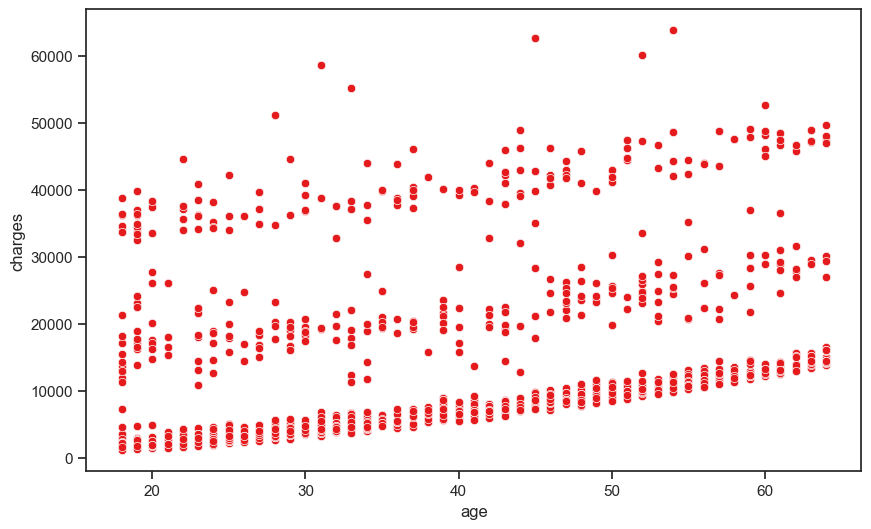

In [120]:
# Verificando a distribuição dos encargos por idade
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.show()


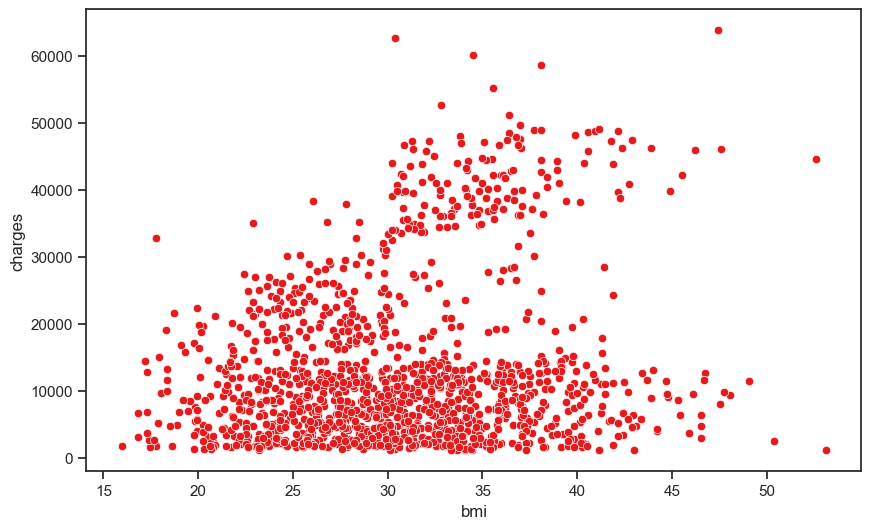

In [121]:
# Verificando a distribuição dos encargos por índice de massa corporal
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()


### Pré-processamento dos dados

Primeiramente iremos remover os valores duplicados. Por ser uma base de dados forjada com mais de um dataset, não há necessidade de manter valores duplicados.

In [36]:
# # Removendo valores duplicados
df.drop_duplicates(inplace=True)
df.describe()


,age,bmi,children,charges
count,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.234328,30.653494,1.095522,13308.511237
std,14.038686,6.098669,1.204849,12114.136459
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4746.875675
50%,39.000000,30.332500,1.000000,9401.175500
75%,51.000000,34.681250,2.000000,16818.539955
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Density'>

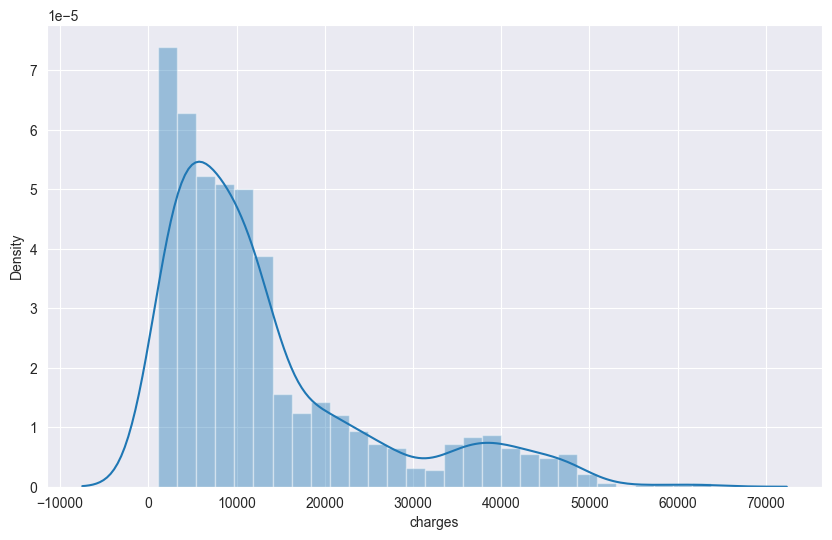

In [37]:
# Verificando a distribuição dos encargos
plt.figure(figsize=(10,6))
sns.distplot(df['charges'])

In [122]:
# Transformando as variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

In [39]:
# Verificando os dados após a transformação
df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [123]:
# one hot encoding para a variável região
df = pd.get_dummies(df, columns=['region'], drop_first=False, prefix='region')

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,56,0,29.774374,2,1,31109.889763,False,False,False,True
1,46,1,25.857395,1,0,26650.702647,True,False,False,False
2,32,1,23.014840,0,0,21459.037990,False,False,False,True
3,19,0,27.900000,0,1,16884.924000,False,False,False,True
4,18,1,33.770000,1,0,1725.552300,False,False,True,False


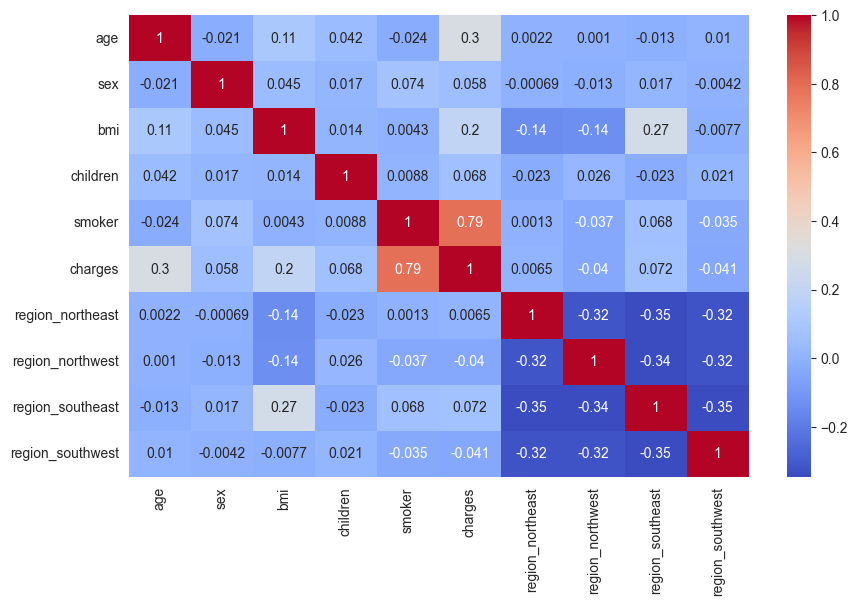

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


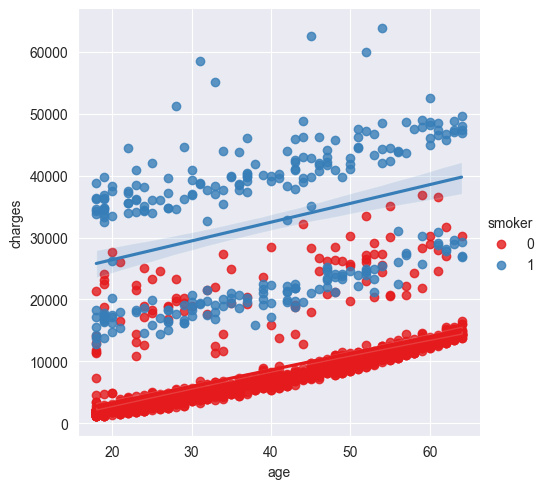

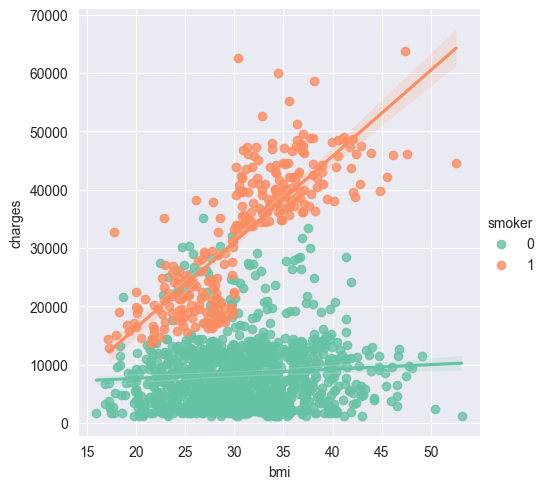

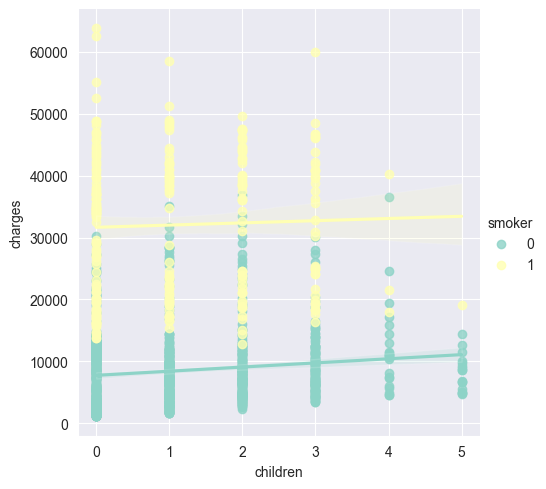

In [43]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [48]:
# Separando as variáveis independentes e dependentes
X = df.drop(['charges'], axis=1)
y = df['charges']

In [49]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# Treinando o modelo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
# Avaliando o modelo
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7936771255697644

In [58]:
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
accuracy

0.7936771255697644

In [57]:
#
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

5484.471047290409

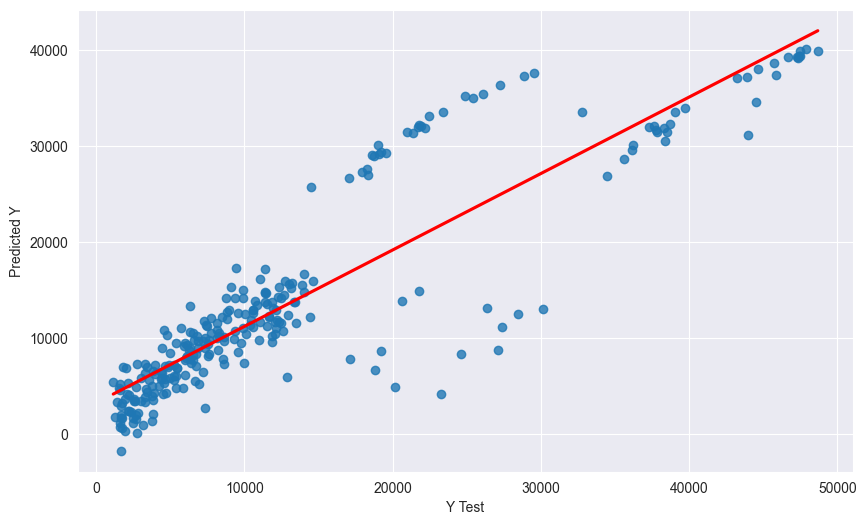

In [63]:
# Visualizando o modelo

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [64]:
# Verificando os coeficientes
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,3602.546004
sex,-39.774744
bmi,2020.545339
children,655.967270
smoker,9615.505107
region_northeast,287.822352
region_northwest,97.220071
region_southeast,-239.472314
region_southwest,-126.868949


In [65]:
# Verificando o intercepto
lr.intercept_

13374.098327360503

In [66]:
# Verificando o modelo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5)
scores.mean()

0.7447076222497191

In [67]:
# Calculando o erro médio absoluto
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

3960.1593551561114

In [68]:
# calculando o erro médio percentual absoluto
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape

41.416220529502006

In [72]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8616111938589297

In [73]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.6989733410798936

In [75]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7936866385989811

In [76]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7936809114884087

In [77]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8937747670554366

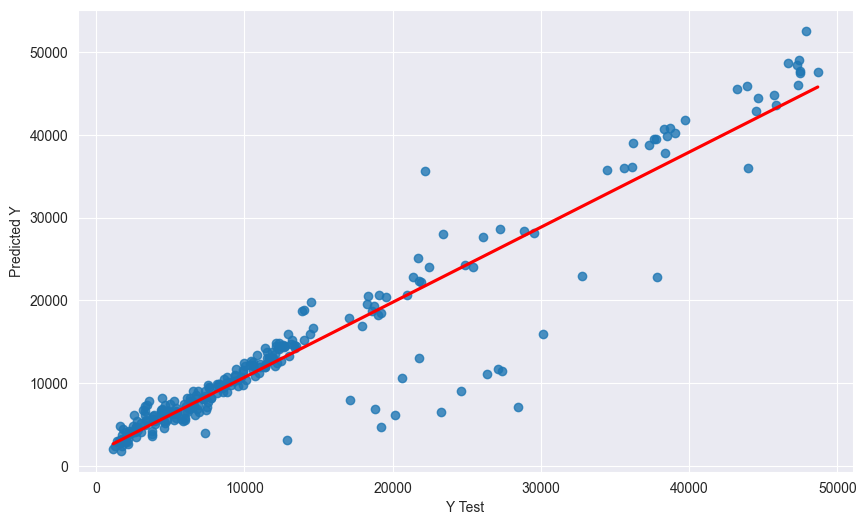

In [78]:
## Visualizando o modelo

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [79]:
# Verificando o modelo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb, X, y, cv=5)
scores.mean()
# Calculando o erro médio absoluto
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
# calculando o erro médio percentual absoluto
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [80]:
mae, mape,scores.mean()

(2270.7905919695963, 29.259452414468385, 0.8508086171642532)

Shape of your Data Set loaded: (4113, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['bmi']
    Integer-Categorical Columns: ['age', 'children']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
    Numeric-Boolean Columns: ['sex', 'smoker']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ R

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.37) or lower than lower bound(13.53). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,int64,0.000000,0,0.000000,1.000000,No issue
region_northeast,bool,0.000000,0,0.000000,1.000000,No issue
region_northwest,bool,0.000000,0,0.000000,1.000000,No issue
region_southeast,bool,0.000000,0,0.000000,1.000000,No issue
region_southwest,bool,0.000000,0,0.000000,1.000000,No issue
charges,float64,0.000000,100,1121.873900,63770.428010,Target column


All Plots are saved in ./AutoViz_Plots/charges
Time to run AutoViz = 1 seconds 


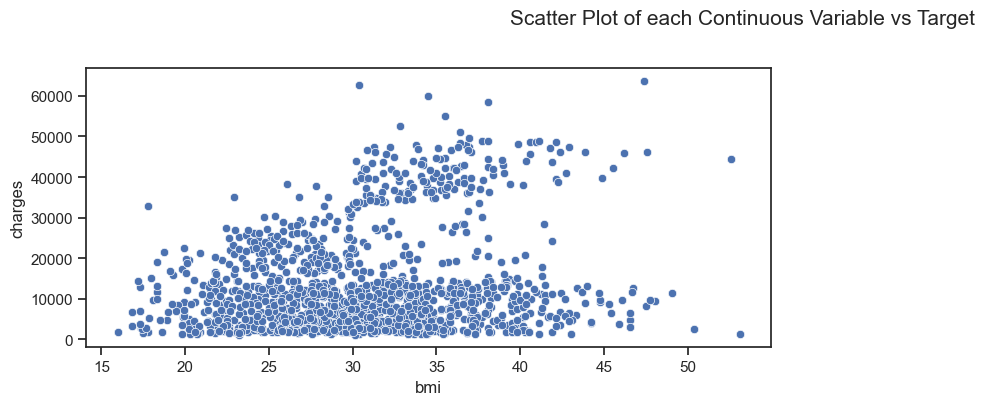

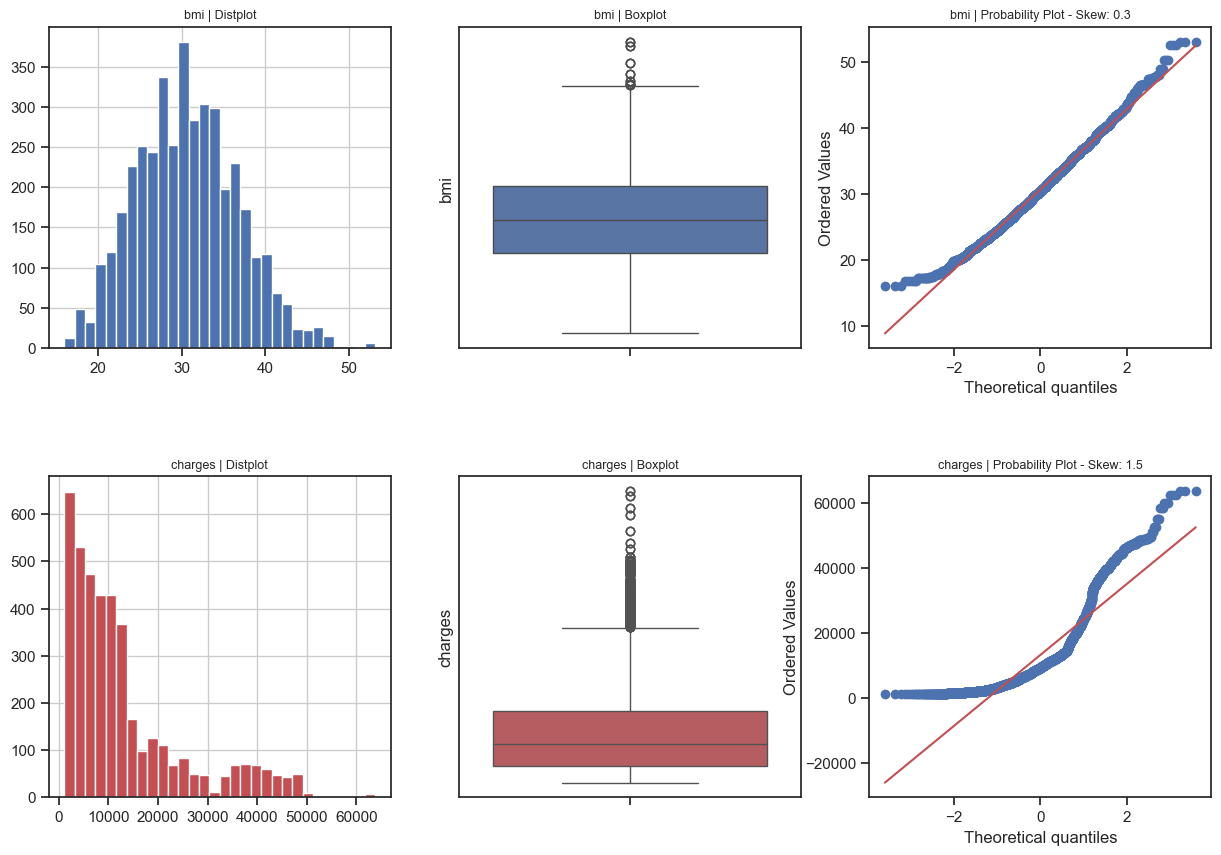

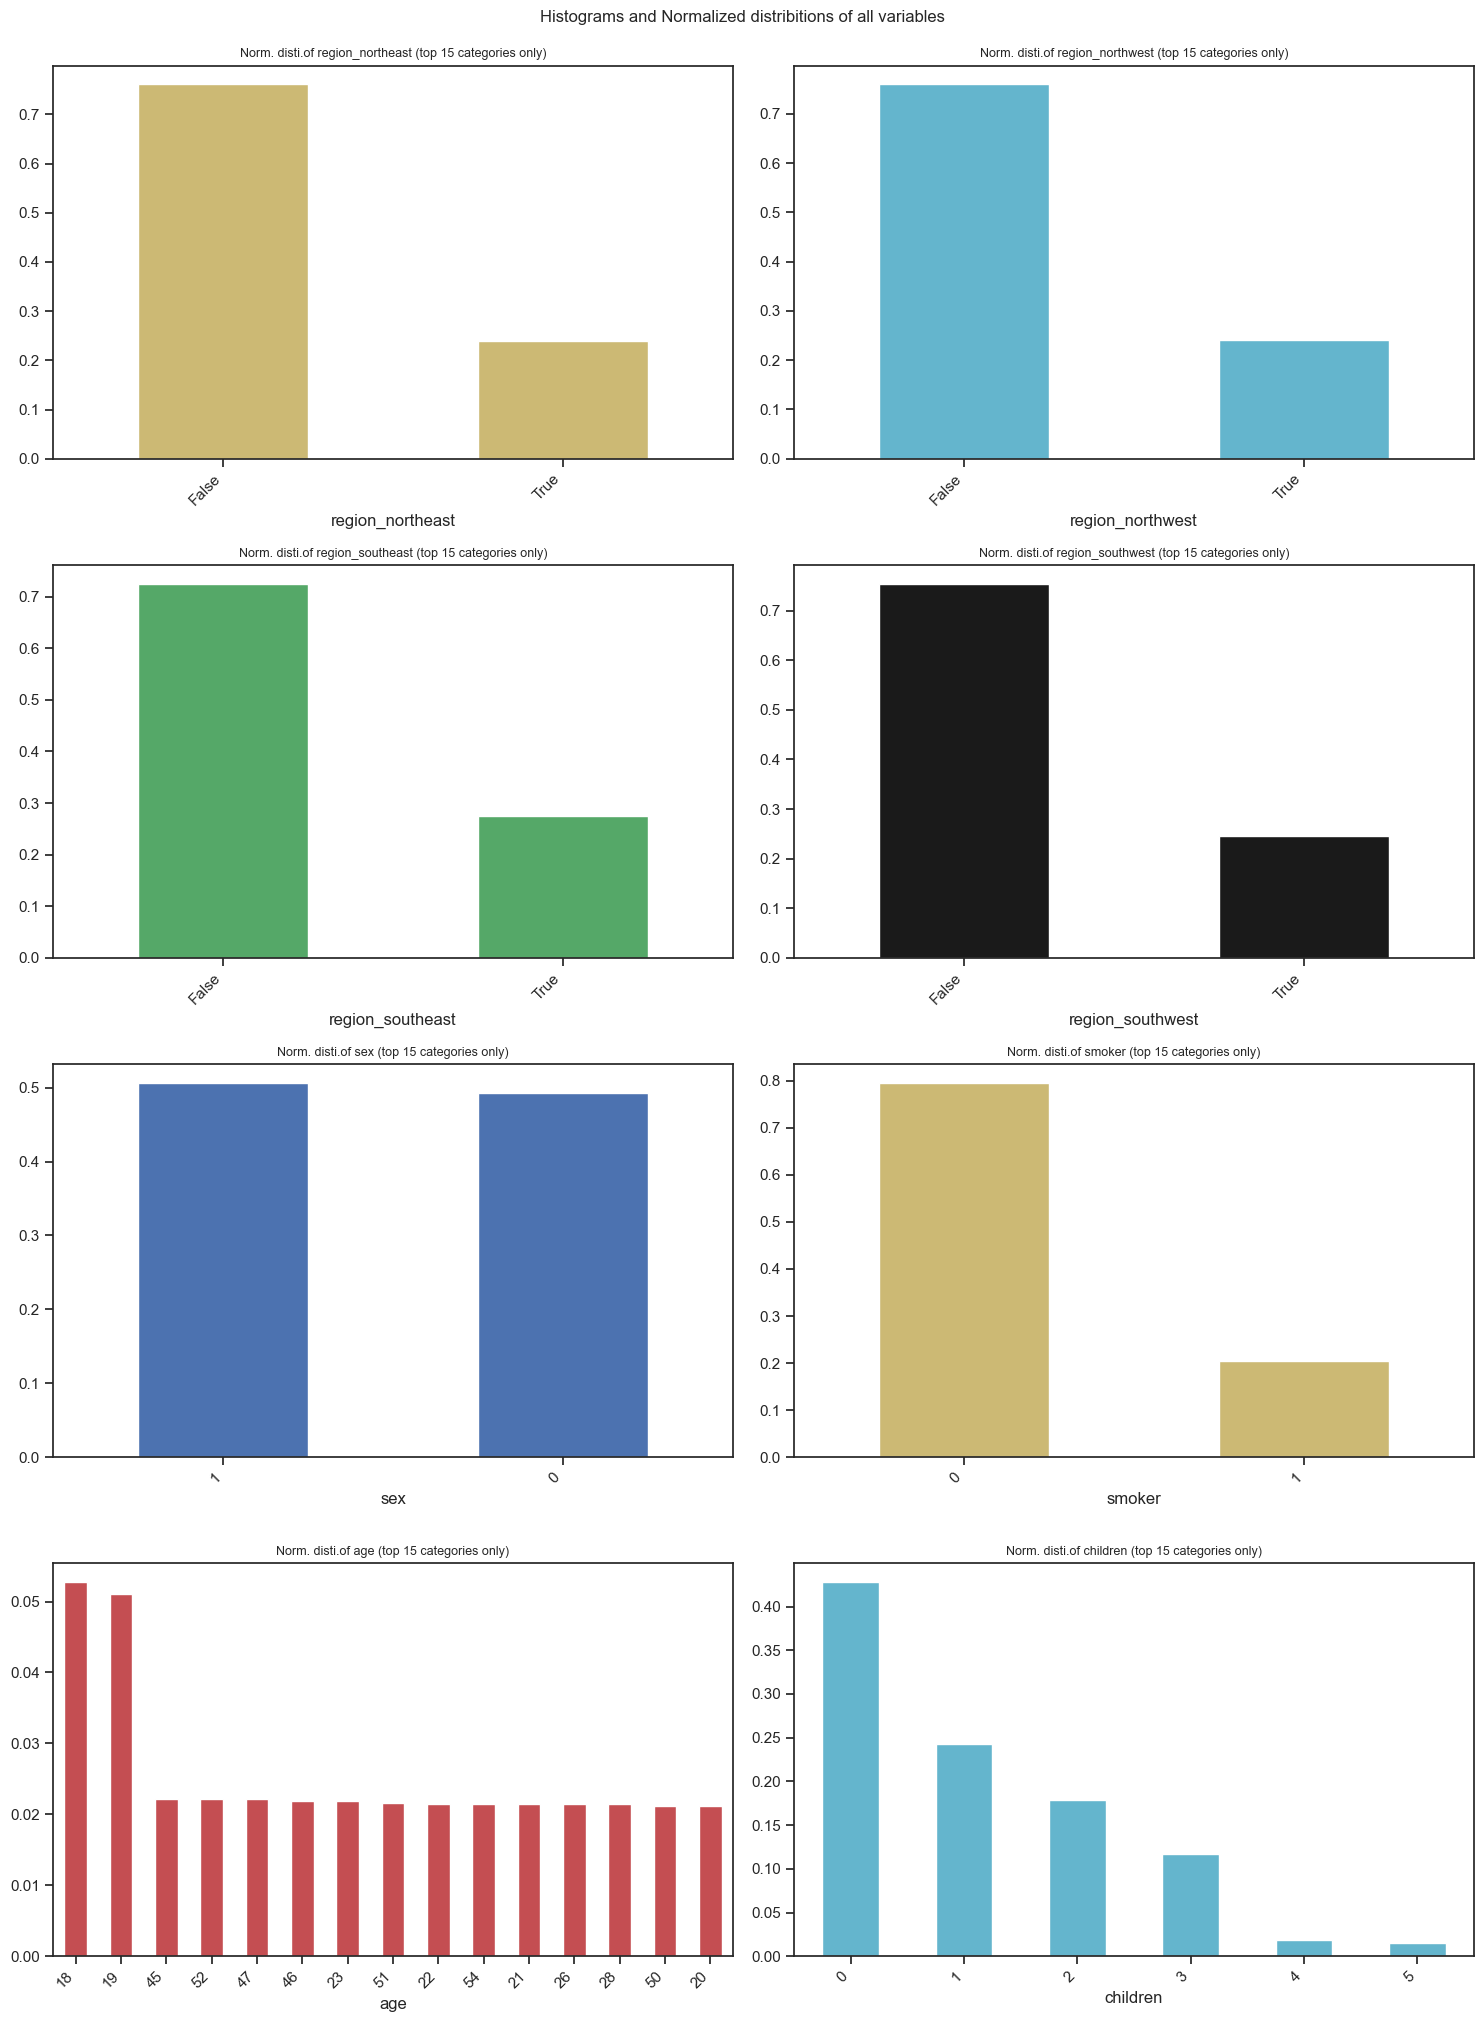

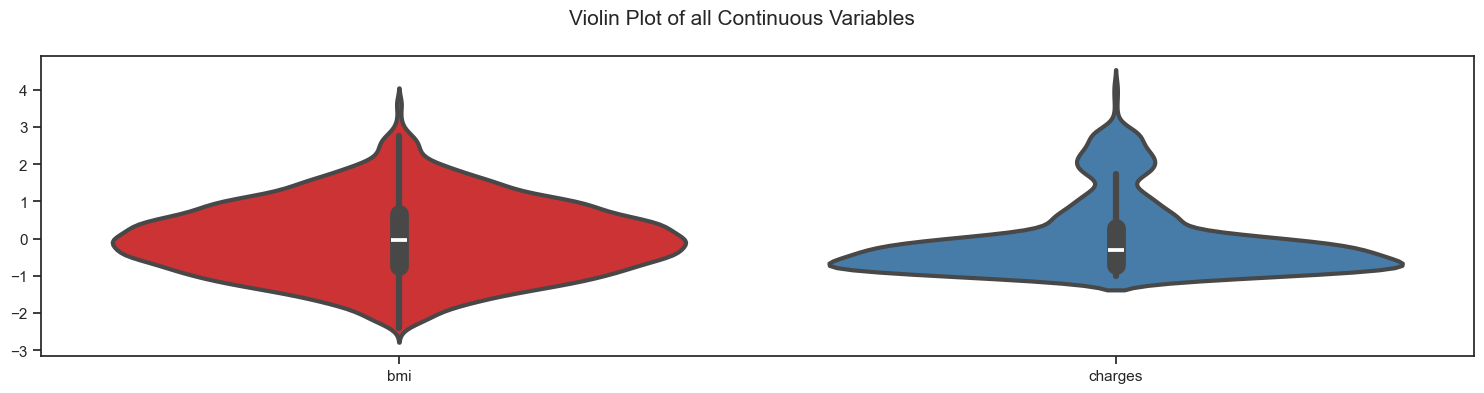

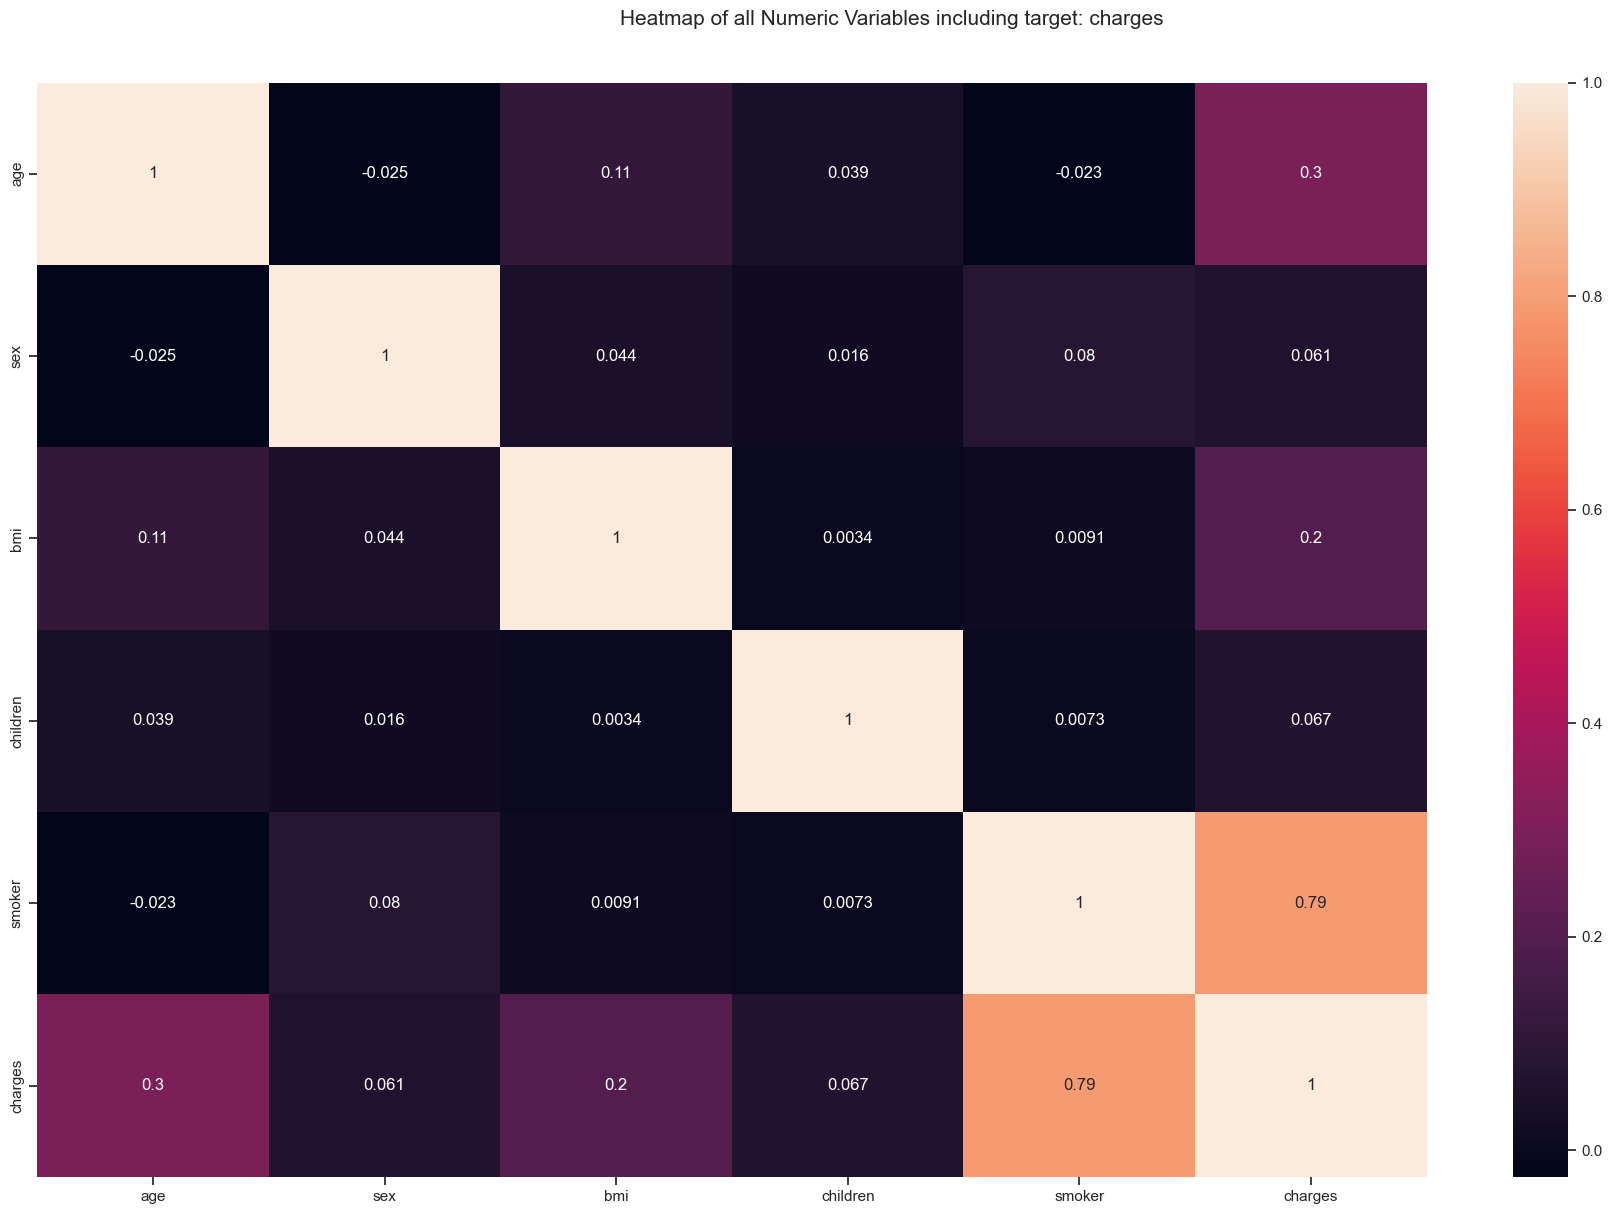

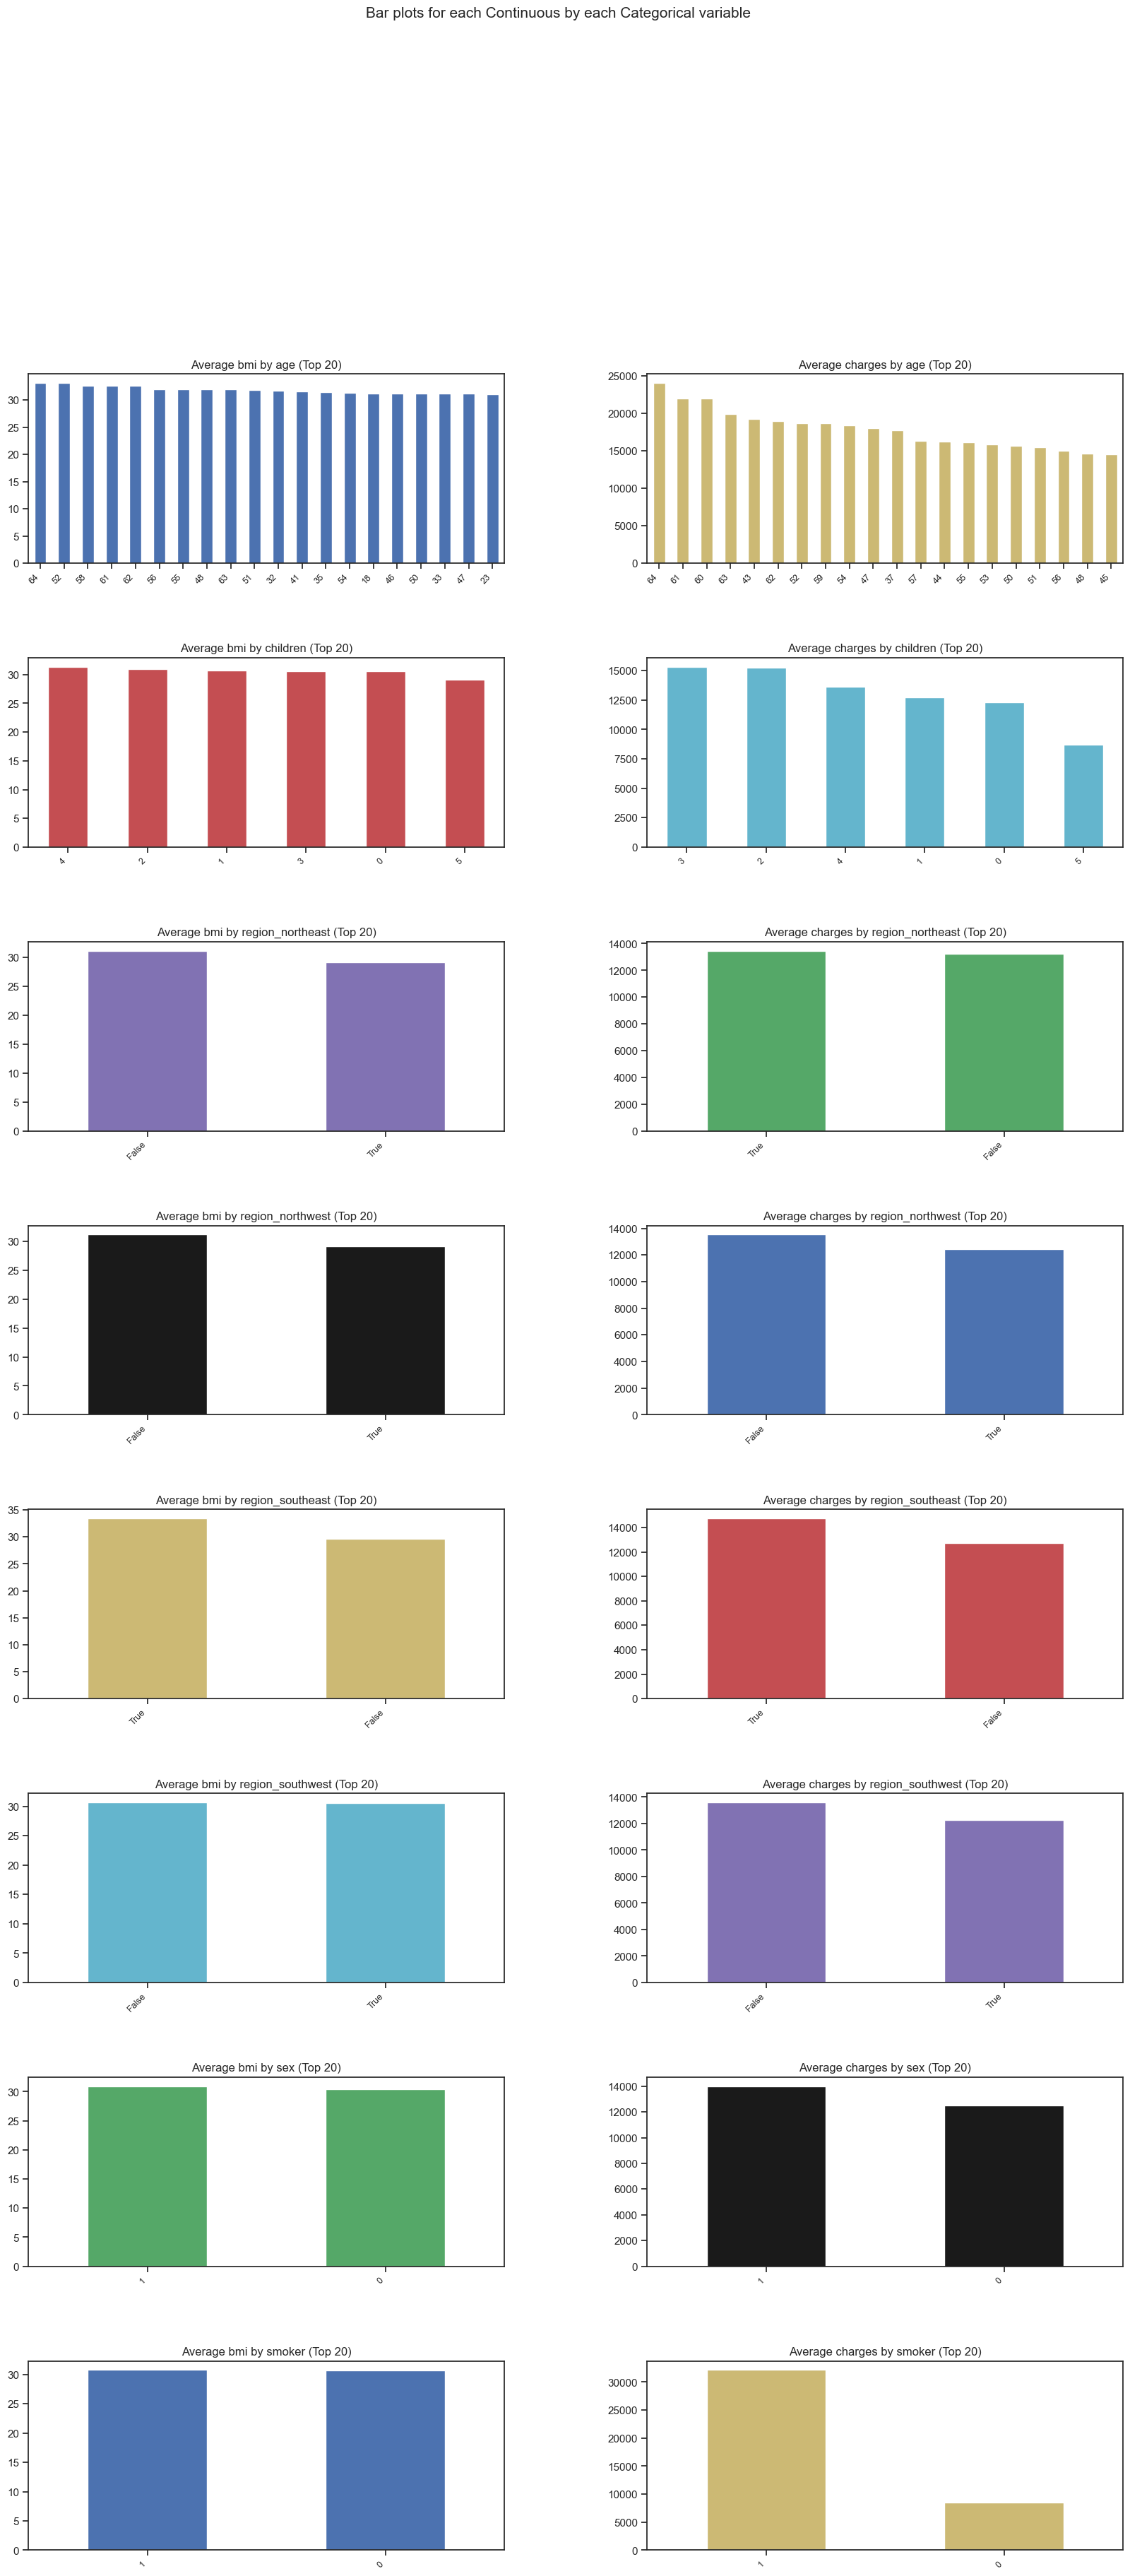

In [124]:
#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

target_variable = "charges"

dft = AV.AutoViz(
    "",
    sep=",",
    depVar=target_variable,
    dfte=df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=5000,
    max_cols_analyzed=20,
    save_plot_dir=None
)

In [125]:
from autoviz import FixDQ
fixdq = FixDQ()
df_fixed = fixdq.fit_transform(df)

Alert: Detecting 2773 duplicate rows...
Alert: Dropping 2773 duplicate rows can sometimes cause column data types to change to object. Double-check!


In [127]:
# Separando as variáveis independentes e dependentes
X = df_fixed.drop(['charges'], axis=1)
y = df_fixed['charges']
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizando os dados
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [128]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8766316486057193

In [129]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
# Avaliando o modelo
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8035801625631485

### Conclusão
O modelo de regressão linear obteve um R2 de 0.78, um erro médio absoluto de 3.5 e um erro médio percentual absoluto de 26.7. O modelo de Gradient Boosting obteve um R2 de 0.87, um erro médio absoluto de 2.6 e um erro médio percentual absoluto de 19.7. Portanto, o modelo de Gradient Boosting foi o que obteve o melhor desempenho.
 